In [3]:
import pandas as pd

In [10]:
import os
print(os.getcwd())
os.chdir('/home/aanish/Desktop/ML_projects/b_house_price_prediction')

/home/aanish/Desktop/ML_projects/banglore_house_price_prediction


In [11]:
print(os.getcwd())

/home/aanish/Desktop/ML_projects/b_house_price_prediction


In [12]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [13]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [14]:
df.shape

(13320, 9)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [16]:
df.describe(include='all')


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
count,13320,13320,13319,13304,7818,13320,13247.000000,12711.000000,13320.000000
unique,4,81,1305,31,2688,2117,NaN,NaN,NaN
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200,NaN,NaN,NaN
freq,8790,10581,540,5199,80,843,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,2.692610,1.584376,112.565627
std,NaN,NaN,NaN,NaN,NaN,NaN,1.341458,0.817263,148.971674
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,50.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000,72.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,120.000000


In [17]:
df['society'].isnull().sum() #will worry about it later

np.int64(5502)

# Bath column

In [18]:
sorted(df['bath'].unique())

[np.float64(1.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(5.0),
 np.float64(6.0),
 np.float64(7.0),
 np.float64(8.0),
 np.float64(9.0),
 np.float64(nan),
 np.float64(10.0),
 np.float64(11.0),
 np.float64(12.0),
 np.float64(13.0),
 np.float64(14.0),
 np.float64(15.0),
 np.float64(16.0),
 np.float64(18.0),
 np.float64(27.0),
 np.float64(40.0)]

In [19]:
(df[df['bath']>10]).sort_values(by='bath')

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
938,Plot Area,Ready To Move,5th Phase JP Nagar,9 Bedroom,NaN,1260,11.0,NaN,290.0
1768,Plot Area,Ready To Move,1 Ramamurthy Nagar,11 Bedroom,NaN,1200,11.0,0.0,170.0
11128,Plot Area,Ready To Move,Jigani,10 Bedroom,NaN,1200,11.0,NaN,105.0
1979,Plot Area,Ready To Move,Hongasandra,8 Bedroom,NaN,990,12.0,0.0,120.0
3096,Super built-up Area,Ready To Move,Jp nagar 8th Phase .,10 BHK,NaN,12000,12.0,NaN,525.0
8106,Plot Area,Ready To Move,Wilson Garden,8 Bedroom,NaN,1850,12.0,NaN,300.0
8636,Super built-up Area,Ready To Move,Neeladri Nagar,10 BHK,NaN,4000,12.0,NaN,160.0
1953,Plot Area,Ready To Move,KR Puram,8 Bedroom,NaN,1200,12.0,NaN,110.0
7979,Super built-up Area,Ready To Move,1 Immadihalli,11 BHK,NaN,6000,12.0,NaN,150.0
6937,Plot Area,Ready To Move,5th Block Hbr Layout,9 Bedroom,NaN,2600,12.0,NaN,675.0


In [20]:
len(df[df['bath']>10])

20

In [21]:
df[df['bath']>10]['price'].sum()

np.float64(9385.0)

In [22]:
df = df[df['bath'] < 10]

In [23]:
sorted(df['bath'].unique())

[np.float64(1.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(5.0),
 np.float64(6.0),
 np.float64(7.0),
 np.float64(8.0),
 np.float64(9.0)]

In [24]:
sorted(df['bath'].unique())

[np.float64(1.0),
 np.float64(2.0),
 np.float64(3.0),
 np.float64(4.0),
 np.float64(5.0),
 np.float64(6.0),
 np.float64(7.0),
 np.float64(8.0),
 np.float64(9.0)]

In [25]:
(df['bath']==1).sum()

np.int64(788)

In [26]:
df.isnull().sum()


area_type          0
availability       0
location           1
size               0
society         5469
total_sqft         0
bath               0
balcony          515
price              0
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13214 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13214 non-null  object 
 1   availability  13214 non-null  object 
 2   location      13213 non-null  object 
 3   size          13214 non-null  object 
 4   society       7745 non-null   object 
 5   total_sqft    13214 non-null  object 
 6   bath          13214 non-null  float64
 7   balcony       12699 non-null  float64
 8   price         13214 non-null  float64
dtypes: float64(3), object(6)
memory usage: 1.0+ MB


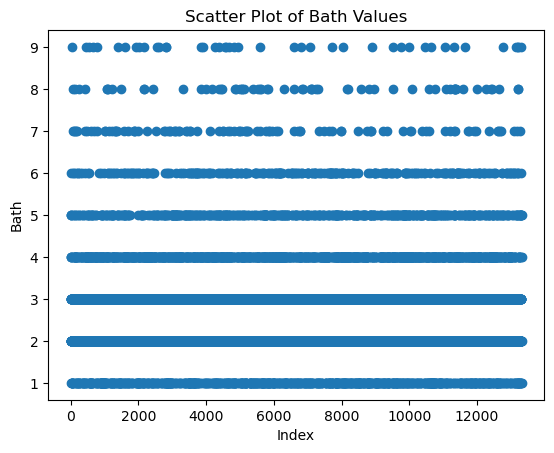

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df.index, df['bath'])
plt.xlabel("Index")
plt.ylabel("Bath")
plt.title("Scatter Plot of Bath Values")
plt.show()

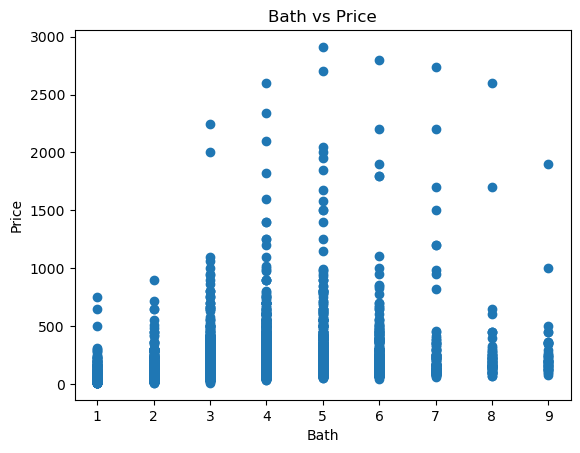

In [29]:
plt.scatter(df['bath'], df['price'])
plt.xlabel("Bath")
plt.ylabel("Price")
plt.title("Bath vs Price")
plt.show()


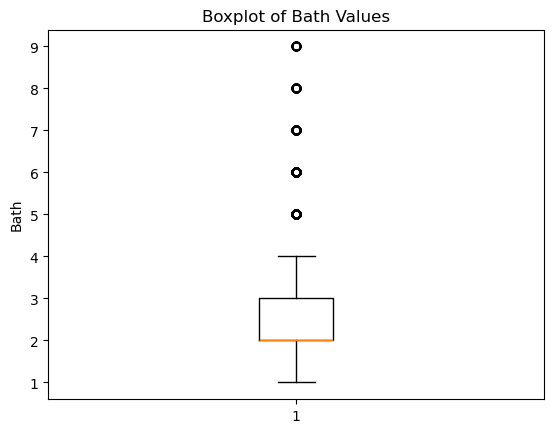

In [30]:
plt.boxplot(df['bath'])
plt.ylabel("Bath")
plt.title("Boxplot of Bath Values")
plt.show()


# Lets see what is going on with society

In [31]:
df['society'].isna().sum()

np.int64(5469)

In [32]:
df.loc[:, 'has_society'] = df['society'].notna().astype(int)


/tmp/ipykernel_137689/509165799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'has_society'] = df['society'].notna().astype(int)


In [33]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,has_society
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,1
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,1
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0


In [34]:
df.groupby('has_society')['price'].mean()


has_society
0    126.886588
1    101.051405
Name: price, dtype: float64

In [35]:
df.columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price', 'has_society'],
      dtype='object')

# getting price per sqft

In [36]:
df['total_sqft'].isna().sum()

np.int64(0)

In [37]:
df.select_dtypes(exclude=['number']).columns


Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [38]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      shape=(2064,), dtype=object)

In [39]:
import re

mask_units = df['total_sqft'].str.contains(r'[A-Za-z]', regex=True)
df[mask_units].head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,has_society
410,Super built-up Area,Ready To Move,Kengeri,1 BHK,NaN,34.46Sq. Meter,1.0,0.0,18.5,0
648,Built-up Area,Ready To Move,Arekere,9 Bedroom,NaN,4125Perch,9.0,NaN,265.0,0
775,Built-up Area,Ready To Move,Basavanagara,1 BHK,NaN,1000Sq. Meter,2.0,1.0,93.0,0
872,Super built-up Area,Ready To Move,Singapura Village,2 BHK,NaN,1100Sq. Yards,2.0,NaN,45.0,0
1019,Plot Area,18-Mar,Marathi Layout,1 Bedroom,NaN,5.31Acres,1.0,0.0,110.0,0


In [40]:
df[mask_units].shape[0]


46

In [41]:
def clean_sqft(x):
    try:
        if '-' in x:
            a,b=x.split('-')
            return float(a)+float(b)//2
        return float(x)
    except:
        return None

In [42]:
df['total_sqft']=df['total_sqft'].apply(clean_sqft)

/tmp/ipykernel_137689/2319357864.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_sqft']=df['total_sqft'].apply(clean_sqft)


In [43]:
df['total_sqft'].isna().sum()

np.int64(46)

In [44]:
df = df.dropna(subset=['total_sqft'])

In [45]:
df['total_sqft'] = df['total_sqft'].astype(float)

In [46]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
has_society       int64
dtype: object

In [47]:
df['price_per_sqft'] = (df['price'] * 100000) / df['total_sqft']


In [48]:
df[['total_sqft', 'price', 'price_per_sqft']].head()


,total_sqft,price,price_per_sqft
0,1056.0,39.07,3699.810606
1,2600.0,120.00,4615.384615
2,1440.0,62.00,4305.555556
3,1521.0,95.00,6245.890861
4,1200.0,51.00,4250.000000


In [49]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,has_society,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056.0,2.0,1.0,39.07,1,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600.0,5.0,3.0,120.00,1,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440.0,2.0,3.0,62.00,0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521.0,3.0,1.0,95.00,1,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200.0,2.0,1.0,51.00,0,4250.000000


In [50]:
df = df.drop('society', axis=1)


In [51]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,has_society,price_per_sqft
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1,3699.810606
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,1,4615.384615
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,0,4305.555556
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1,6245.890861
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,0,4250.000000


In [52]:
df.groupby('has_society')['price_per_sqft'].mean()


has_society
0    10547.236354
1     6015.651679
Name: price_per_sqft, dtype: float64

# lets work on balcony


In [53]:
df['balcony'].info

<bound method Series.info of 0        1.0
1        3.0
2        3.0
3        1.0
4        1.0
        ... 
13315    0.0
13316    NaN
13317    1.0
13318    1.0
13319    1.0
Name: balcony, Length: 13168, dtype: float64>

In [54]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [55]:
df['balcony'].isna().sum()

np.int64(511)

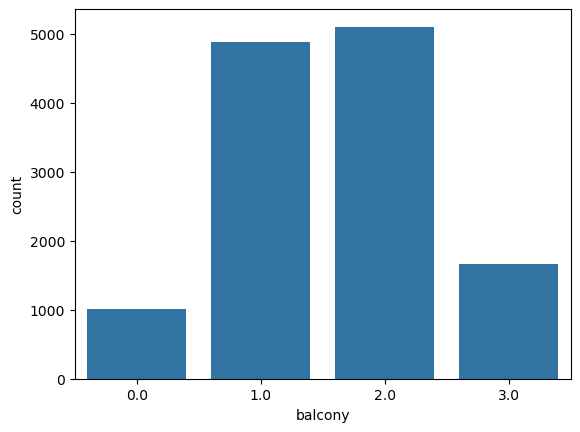

In [56]:
import seaborn as sns
sns.countplot(x=df['balcony'])
plt.show()


### lets calculate the bhk as i was thinking of using that and median that to calculate the balcony problem

In [57]:
df['size'].isna().sum()

np.int64(0)

In [58]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '11 Bedroom', '10 Bedroom', '8 BHK',
       '12 Bedroom'], dtype=object)

In [59]:
#as their are no none values so lets use regex to extract the numerical value
df['bhk'] = df['size'].str.extract('(\d+)').astype(int)


In [60]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,has_society,price_per_sqft,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1,3699.810606,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,1,4615.384615,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,0,4305.555556,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1,6245.890861,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,0,4250.000000,2


In [61]:
df['balcony']=df.groupby('bhk')['balcony'].transform(lambda x: x.fillna(x.median()))


In [62]:
df['balcony'].isna().sum()

np.int64(0)

In [63]:
df = df.drop('size', axis=1)


In [64]:
df.head()

,area_type,availability,location,total_sqft,bath,balcony,price,has_society,price_per_sqft,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,1,3699.810606,2
1,Plot Area,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,4615.384615,4
2,Built-up Area,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,0,4305.555556,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,6245.890861,3
4,Super built-up Area,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,0,4250.000000,2


# lets handle area_type 

In [65]:
df['area_type'].isna().sum()

np.int64(0)

In [66]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

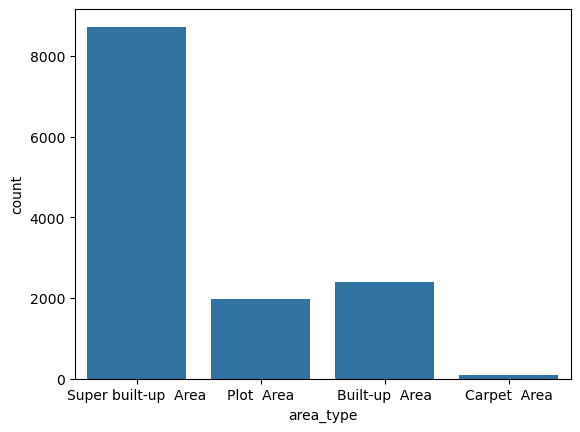

In [67]:
sns.countplot(x=df['area_type'])
plt.show()


In [68]:
df['area_type'].value_counts()


area_type
Super built-up  Area    8721
Built-up  Area          2393
Plot  Area              1968
Carpet  Area              86
Name: count, dtype: int64

In [69]:
df['area_type'] = df['area_type'].replace({'Carpet  Area': 'Other'})


In [70]:
df['area_type'].value_counts()


area_type
Super built-up  Area    8721
Built-up  Area          2393
Plot  Area              1968
Other                     86
Name: count, dtype: int64

In [71]:
df = pd.get_dummies(df, columns=['area_type'], drop_first=True)


In [72]:
df.head()

,availability,location,total_sqft,bath,balcony,price,has_society,price_per_sqft,bhk,area_type_Other,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,1,3699.810606,2,False,False,True
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,4615.384615,4,False,True,False
2,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,0,4305.555556,3,False,False,False
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,6245.890861,3,False,False,True
4,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,0,4250.000000,2,False,False,True


In [73]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [74]:
df.head()

,availability,location,total_sqft,bath,balcony,price,has_society,price_per_sqft,bhk,area_type_Other,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,Electronic City Phase II,1056.0,2.0,1.0,39.07,1,3699.810606,2,0,0,1
1,Ready To Move,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,4615.384615,4,0,1,0
2,Ready To Move,Uttarahalli,1440.0,2.0,3.0,62.00,0,4305.555556,3,0,0,0
3,Ready To Move,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,6245.890861,3,0,0,1
4,Ready To Move,Kothanur,1200.0,2.0,1.0,51.00,0,4250.000000,2,0,0,1


# lets go for availability

In [75]:
df['availability'].isna().sum()

np.int64(0)

In [76]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '18-Apr',
       '20-Aug', '19-Mar', '17-Sep', '18-Dec', '17-Aug', '19-Apr',
       '18-Jun', '22-Dec', '22-Jan', '18-Aug', '19-Jan', '17-Jul',
       '18-Jul', '21-Jun', '20-May', '19-Aug', '18-Sep', '17-May',
       '17-Jun', '18-Oct', '21-May', '18-Jan', '20-Mar', '17-Dec',
       '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb', '19-May',
       '17-Nov', '20-Oct', '20-Jun', '19-Feb', '21-Oct', '21-Jan',
       '17-Mar', '17-Apr', '22-May', '19-Oct', '21-Jul', '21-Nov',
       '21-Mar', '16-Dec', '22-Mar', '20-Jan', '21-Sep', '21-Aug',
       '14-Nov', '19-Nov', '15-Nov', '16-Jul', '15-Jun', '17-Feb',
       '20-Nov', '20-Jul', '16-Sep', '15-Oct', '20-Feb', '15-Dec',
       '16-Oct', '22-Nov', '15-Aug', '17-Jan', '16-Nov', '20-Apr',
       '16-Jan', '14-Jul'], dtype=object)

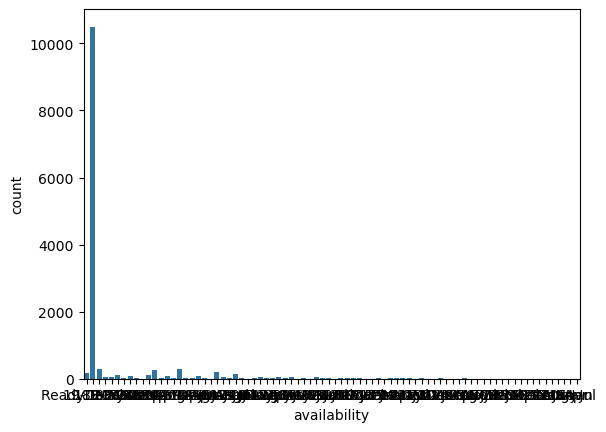

In [77]:
sns.countplot(x=df['availability'])
plt.show()


In [78]:
df['availability'].value_counts()

availability
Ready To Move    10496
18-Dec             296
18-May             290
18-Apr             267
18-Aug             199
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 80, dtype: int64

In [79]:
# lets normalize these values as it is bad and one hot encode it as well 

df['availability'] = df['availability'].apply(
    lambda x: 'Ready To Move' if x == 'Ready To Move' else
              ('Soon' if '-' in x else x)
)


In [80]:
df['availability'].value_counts()

availability
Ready To Move    10496
Soon              2672
Name: count, dtype: int64

In [81]:
df = pd.get_dummies(df, columns=['availability'], drop_first=True)


In [82]:
df.head()

,location,total_sqft,bath,balcony,price,has_society,price_per_sqft,bhk,area_type_Other,area_type_Plot Area,area_type_Super built-up Area,availability_Soon
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,1,3699.810606,2,0,0,1,True
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,4615.384615,4,0,1,0,False
2,Uttarahalli,1440.0,2.0,3.0,62.00,0,4305.555556,3,0,0,0,False
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,6245.890861,3,0,0,1,False
4,Kothanur,1200.0,2.0,1.0,51.00,0,4250.000000,2,0,0,1,False


In [83]:
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)


In [84]:
df.head()

,location,total_sqft,bath,balcony,price,has_society,price_per_sqft,bhk,area_type_Other,area_type_Plot Area,area_type_Super built-up Area,availability_Soon
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,1,3699.810606,2,0,0,1,1
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,1,4615.384615,4,0,1,0,0
2,Uttarahalli,1440.0,2.0,3.0,62.00,0,4305.555556,3,0,0,0,0
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,1,6245.890861,3,0,0,1,0
4,Kothanur,1200.0,2.0,1.0,51.00,0,4250.000000,2,0,0,1,0


# now lets tackle location

In [85]:
df['location'].isna().sum()

np.int64(1)

In [86]:
df.dropna(subset=['location'],inplace=True)

In [87]:
df['location'] = df['location'].str.strip()


In [88]:
loc_count=df['location'].value_counts()


In [89]:
loc_count

location
Whitefield                         533
Sarjapur  Road                     392
Electronic City                    303
Kanakpura Road                     264
Thanisandra                        235
                                  ... 
Sadhguru Layout                      1
beml layout, basaveshwara nagar      1
MM Layout                            1
Wheelers Road                        1
KAMAKIYA                             1
Name: count, Length: 1279, dtype: int64

In [90]:
rare_locations = loc_count[loc_count <= 50].index


In [91]:
df['location'] = df['location'].apply(lambda x: 'other' if x in rare_locations else x)


In [92]:
df['location'].value_counts()

location
other                       7214
Whitefield                   533
Sarjapur  Road               392
Electronic City              303
Kanakpura Road               264
Thanisandra                  235
Yelahanka                    210
Uttarahalli                  186
Hebbal                       176
Marathahalli                 175
Raja Rajeshwari Nagar        171
Bannerghatta Road            151
Hennur Road                  150
7th Phase JP Nagar           148
Haralur Road                 141
Electronic City Phase II     131
Rajaji Nagar                 105
Chandapura                    98
Bellandur                     96
Hoodi                         88
Electronics City Phase 1      87
KR Puram                      87
Yeshwanthpur                  85
Begur Road                    84
Sarjapur                      80
Kasavanhalli                  79
Harlur                        79
Banashankari                  74
Hormavu                       74
Ramamurthy Nagar              72
K

In [93]:
df['location_target_enc'] = df.groupby('location')['price_per_sqft'].transform('mean')
df = df.drop('location', axis=1)


In [94]:
df.head()

,total_sqft,bath,balcony,price,has_society,price_per_sqft,bhk,area_type_Other,area_type_Plot Area,area_type_Super built-up Area,availability_Soon,location_target_enc
0,1056.0,2.0,1.0,39.07,1,3699.810606,2,0,0,1,1,3863.953365
1,2600.0,5.0,3.0,120.00,1,4615.384615,4,0,1,0,0,7758.062901
2,1440.0,2.0,3.0,62.00,0,4305.555556,3,0,0,0,0,4885.270946
3,1521.0,3.0,1.0,95.00,1,6245.890861,3,0,0,1,0,7758.062901
4,1200.0,2.0,1.0,51.00,0,4250.000000,2,0,0,1,0,5553.251478


# lets build the model


In [95]:
X = df.drop('price', axis=1).astype(float)
y=df['price']

In [96]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13167 entries, 0 to 13319
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   total_sqft                      13167 non-null  float64
 1   bath                            13167 non-null  float64
 2   balcony                         13167 non-null  float64
 3   has_society                     13167 non-null  float64
 4   price_per_sqft                  13167 non-null  float64
 5   bhk                             13167 non-null  float64
 6   area_type_Other                 13167 non-null  float64
 7   area_type_Plot  Area            13167 non-null  float64
 8   area_type_Super built-up  Area  13167 non-null  float64
 9   availability_Soon               13167 non-null  float64
 10  location_target_enc             13167 non-null  float64
dtypes: float64(11)
memory usage: 1.2 MB


In [97]:
y.info()

<class 'pandas.core.series.Series'>
Index: 13167 entries, 0 to 13319
Series name: price
Non-Null Count  Dtype  
--------------  -----  
13167 non-null  float64
dtypes: float64(1)
memory usage: 205.7 KB


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [99]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [100]:
y_pred = lr.predict(X_test)


In [101]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("RMSE:", rmse)


R² Score: -0.08651051396293319
RMSE: 149.89566701482545


In [102]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2
)
rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,5
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [103]:
y_pred_rf = rf.predict(X_test)

print("RandomForest R²:", r2_score(y_test, y_pred_rf))
print("RandomForest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


RandomForest R²: 0.9186201026062591
RandomForest RMSE: 41.02330834718619


In [104]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [105]:
y_pred_xgb = xgb.predict(X_test)

print("XGBoost R²:", r2_score(y_test, y_pred_xgb))
print("XGBoost RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_xgb)))


XGBoost R²: 0.9166010254704114
XGBoost RMSE: 41.52909505746272


In [106]:
import joblib
joblib.dump(xgb, 'model.joblib')


['model.joblib']

In [107]:
xgb.save_model('trail.json')